In [2]:
from google.colab import files
uploaded = files.upload()


Saving biased_gender_loans (1).csv to biased_gender_loans (1).csv


In [3]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- Step 2: Load Dataset ---
df = pd.read_csv("biased_gender_loans (1).csv")

# Preview
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())

Dataset shape: (10000, 4)
   salary  years_exp    sex bank_loan
0    1107         19  Woman        No
1    1267         10  Woman        No
2     896         19  Woman        No
3    1226         16  Woman        No
4    1207         19  Woman        No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   salary     10000 non-null  int64 
 1   years_exp  10000 non-null  int64 
 2   sex        10000 non-null  object
 3   bank_loan  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB
None


In [5]:
# --- Step 3: Check for Missing Values and Data Types ---
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing values:
 salary       0
years_exp    0
sex          0
bank_loan    0
dtype: int64

Data Types:
 salary        int64
years_exp     int64
sex          object
bank_loan    object
dtype: object


In [6]:
# --- Step 4: Basic Statistics ---
print("\nDescriptive Statistics:\n", df.describe(include='all'))


Descriptive Statistics:
               salary     years_exp    sex bank_loan
count   10000.000000  10000.000000  10000     10000
unique           NaN           NaN      2         2
top              NaN           NaN  Woman        No
freq             NaN           NaN   5006      6909
mean     1499.792700     19.496800    NaN       NaN
std       301.737217      5.040211    NaN       NaN
min       372.000000      1.000000    NaN       NaN
25%      1292.000000     16.000000    NaN       NaN
50%      1501.000000     19.000000    NaN       NaN
75%      1703.000000     23.000000    NaN       NaN
max      2578.000000     41.000000    NaN       NaN


In [7]:
# --- Step 5: Check Representation Imbalance ---
print("\nCounts by Gender:\n", df['sex'].value_counts(normalize=True))


Counts by Gender:
 sex
Woman    0.5006
Man      0.4994
Name: proportion, dtype: float64


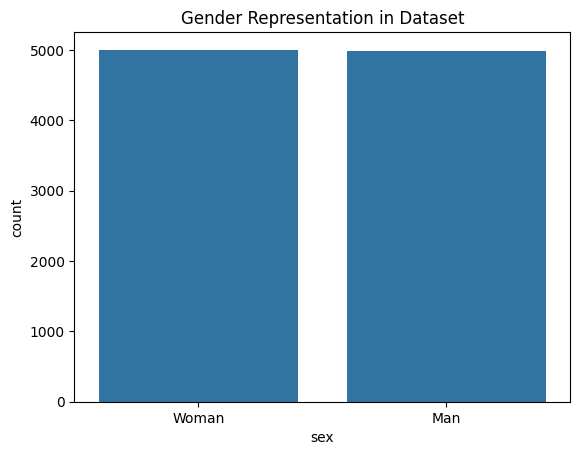

In [8]:
sns.countplot(data=df, x='sex')
plt.title("Gender Representation in Dataset")
plt.show()


Loan Approval Counts:
 bank_loan
No     0.6909
Yes    0.3091
Name: proportion, dtype: float64


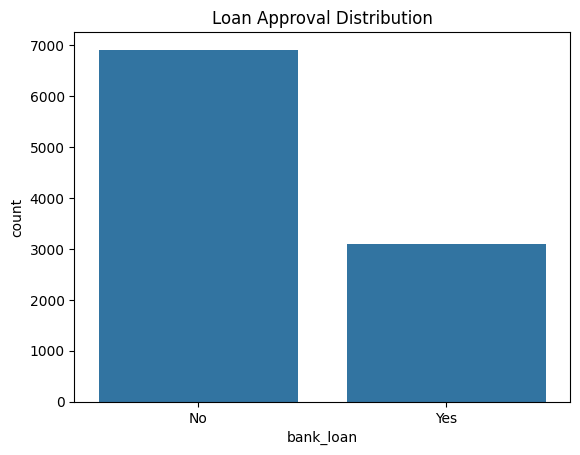

In [9]:
# --- Step 6: Check Outcome Distribution ---
# Assuming target variable is 'loan_approved' (replace if different)
print("\nLoan Approval Counts:\n", df['bank_loan'].value_counts(normalize=True))
sns.countplot(data=df, x='bank_loan')
plt.title("Loan Approval Distribution")
plt.show()

In [10]:
# --- Step 7: Group Analysis by Gender ---

# Convert 'bank_loan' to numeric: Yes=1, No=0
df['bank_loan_numeric'] = df['bank_loan'].map({'Yes': 1, 'No': 0})

# Group by gender and calculate selection rate (mean of numeric values)
group_metrics = df.groupby('sex')['bank_loan_numeric'].agg(['mean', 'count'])
group_metrics.rename(columns={'mean': 'Selection Rate'}, inplace=True)

print("\nSelection Rate by Gender:\n", group_metrics)


Selection Rate by Gender:
        Selection Rate  count
sex                         
Man          0.429315   4994
Woman        0.189173   5006


/tmp/ipython-input-1868736922.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='bank_loan_numeric', ci=None)


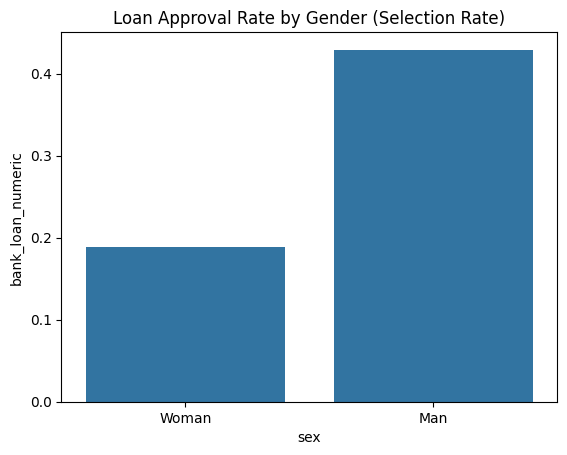

In [11]:
# --- Step 8: Check Approval Rate by Gender ---
sns.barplot(data=df, x='sex', y='bank_loan_numeric', ci=None)
plt.title("Loan Approval Rate by Gender (Selection Rate)")
plt.show()

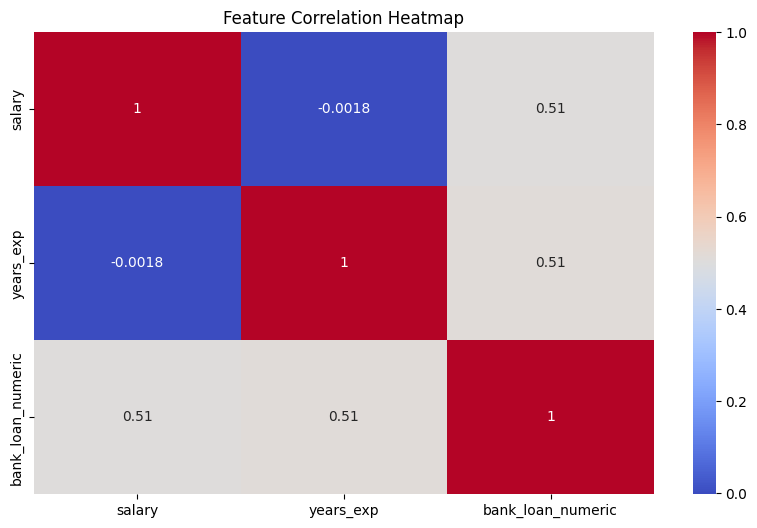

In [12]:
# --- Step 9: Correlation Analysis ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


=== Fairness Summary by Gender ===

       Selection Rate  Average Salary  Average Experience   Count
Woman           0.189         1500.63               19.47  5006.0
Man             0.429         1498.95               19.53  4994.0


/tmp/ipython-input-2483364350.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='bank_loan', palette='pastel', ci=None)
/tmp/ipython-input-2483364350.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='bank_loan', palette='pastel', ci=None)


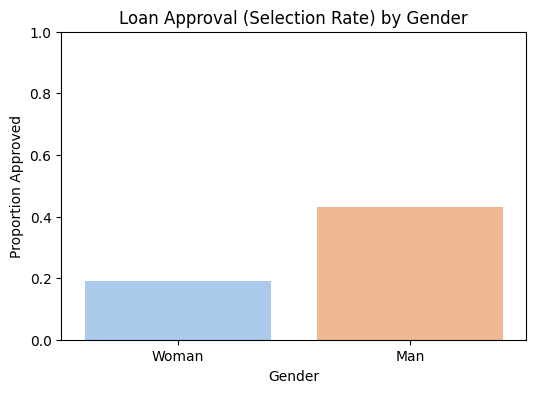

In [14]:
# %%
# --- Step 10: Fairness Metrics by Gender (based on ground truth) ---

# Ensure 'bank_loan' is numeric: Yes = 1, No = 0
if df['bank_loan'].dtype == 'object':
    df['bank_loan'] = df['bank_loan'].map({'Yes': 1, 'No': 0})

# Dictionary to store metrics for each gender
metrics_by_group = {}

for gender in df['sex'].unique():
    group = df[df['sex'] == gender]

    # --- Fairness-related metrics ---
    selection_rate = group['bank_loan'].mean()  # fraction approved

    # --- Contextual metrics (not fairness, but helps interpret differences) ---
    avg_salary = group['salary'].mean()
    avg_exp = group['years_exp'].mean()
    total_count = len(group)

    metrics_by_group[gender] = {
        'Selection Rate': round(selection_rate, 3),
        'Average Salary': round(avg_salary, 2),
        'Average Experience': round(avg_exp, 2),
        'Count': total_count
    }

# Convert metrics to a DataFrame for clear viewing
fairness_df = pd.DataFrame(metrics_by_group).T

print("\n=== Fairness Summary by Gender ===\n")
print(fairness_df)

# --- Visualization of selection rate ---
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='sex', y='bank_loan', palette='pastel', ci=None)
plt.title("Loan Approval (Selection Rate) by Gender")
plt.ylabel("Proportion Approved")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()
